the purpose of this project is to detect if a customer is involved in money laundering

1/preprocessing


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# we have first imported a data from kaggle,more information about the dataset are in link below
#https://www.kaggle.com/datasets/maryam1212/money-laundering-data

df = pd.read_csv('ML.csv')

In [4]:
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none


In [5]:
df.describe()

,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [6]:
df.describe (include= ['O'])

,typeofaction,date,typeoffraud
count,2340,2340,2340
unique,2,2309,4
top,transfer,2019-05-12 14:02:00,none
freq,1580,2,941


In [7]:
# as we saw in the dataset,when isfraud field is 1 it means that person commits money laundering crime and type of money laundering crime is saved in typeoffraud field but since we are not interested in the type of fraud but only in  the fraud itself, we will delete the variable "typeoffraud
df.drop(["typeoffraud"], axis = 1, inplace=True)

In [8]:
df.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
dtype: object

In [9]:
#we will change the type of sourceid and destinationid into cathegorical 
df['sourceid']=df['sourceid'].astype('object')
df['destinationid']=df['destinationid'].astype('object')

In [10]:
df.dtypes

typeofaction     object
sourceid         object
destinationid    object
amountofmoney     int64
date             object
isfraud           int64
dtype: object

In [11]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['typeofaction'] = label_encoder.fit_transform(df['typeofaction'])
df["date"] = label_encoder.fit_transform(df["date"])

In [12]:
#we will check if the dataset contain empty columns
print(df.isnull().sum().sum())

0


In [13]:
#we check if the the data in the variable 'isfraud' is balanced, we found out that it's not but we decided not to do down simpling so that we don't lose data
df['isfraud'].value_counts()

1    1399
0     941
Name: isfraud, dtype: int64

In [14]:
#we will split our data to features data (X) and target data (Y) 
X = df.iloc[:,0:5].values
Y = df.iloc[:,5].values

In [15]:
X

array([[0, 30105, 28942, 494528, 2297],
       [0, 30105, 8692, 494528, 1322],
       [0, 30105, 60094, 494528, 2307],
       ...,
       [1, 27332, 43793, 106907, 1202],
       [1, 32685, 43793, 106907, 2125],
       [1, 26390, 43793, 106907, 499]], dtype=object)

In [16]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
#we split data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

2/creating the model and testing 


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [20]:
#Confusion Matrix

def conf(algo_name,X_test, Y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(Y_pred, Y_test)
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )

we will use different models(SVM/NN/RANDOM FOREST/LOGISTIC REGRESSION and at the end we will choose the one with the best accuracy


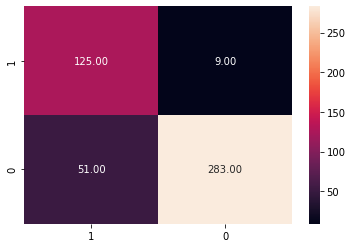

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
conf(classifier,X_test, Y_test)


In [22]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(Y_test, Y_pred))

0.8717948717948718


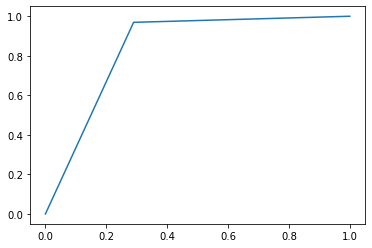

In [23]:
from sklearn import metrics
yp = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))

<AxesSubplot:>

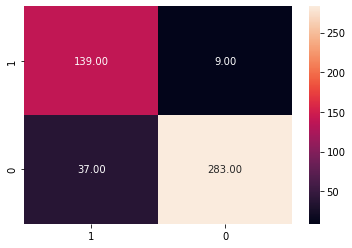

In [24]:
#Confusion Matrix
# rbf
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

forest_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )


In [25]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(Y_test, Y_pred))

0.9017094017094017


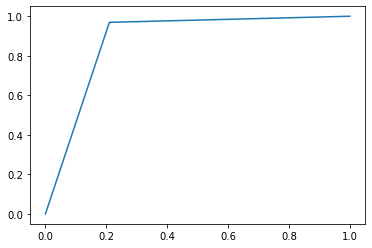

In [26]:
from sklearn import metrics
yp = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))

<AxesSubplot:>

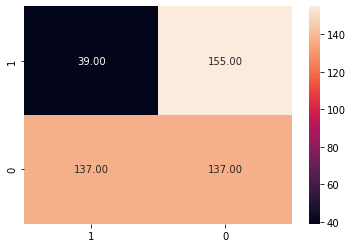

In [27]:
#Confusion Matrix
# sigmoid
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

forest_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )


In [28]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(Y_test, Y_pred))

0.37606837606837606


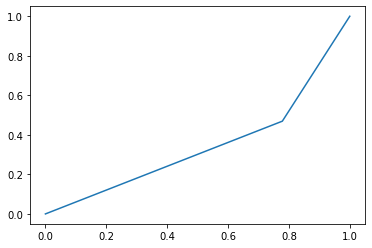

In [29]:
from sklearn import metrics
yp = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))

In [30]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [31]:
Y_pred= classifier.predict(X_test)

In [32]:
Y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,

<AxesSubplot:>

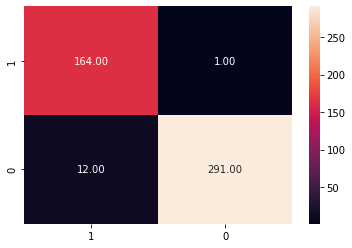

In [33]:
forest_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )

In [34]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.9722222222222222


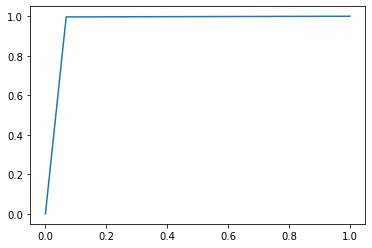

In [35]:
from sklearn import metrics
yp = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# create model
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
188/188 [==============================] - 5s 3ms/step - loss: 0.7497 - accuracy: 0.4877
Epoch 2/150
188/188 [==============================] - 1s 4ms/step - loss: 0.6684 - accuracy: 0.5972
Epoch 3/150
188/188 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6191
Epoch 4/150
188/188 [==============================] - 1s 3ms/step - loss: 0.6311 - accuracy: 0.6565
Epoch 5/150
188/188 [==============================] - 1s 3ms/step - loss: 0.6028 - accuracy: 0.6843
Epoch 6/150
188/188 [==============================] - 1s 3ms/step - loss: 0.5625 - accuracy: 0.7126
Epoch 7/150
188/188 [==============================] - 1s 3ms/step - loss: 0.5117 - accuracy: 0.7655
Epoch 8/150
188/188 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.8120
Epoch 9/150
188/188 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8403
Epoch 10/150
188/188 [==============================] - 0s 3ms/step - loss: 0.3883 - accura

In [38]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

15/15 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.9231
accuracy: 92.31%


15/15 [==============================] - 0s 2ms/step


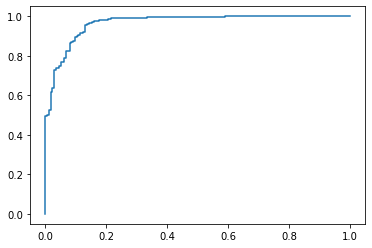

In [39]:
from sklearn import metrics
yp = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))

In [40]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [41]:
Y_pred= classifier.predict(X_test)

In [42]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

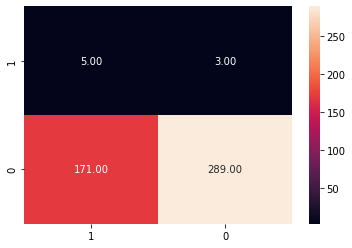

In [43]:
forest_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )

In [44]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.6282051282051282


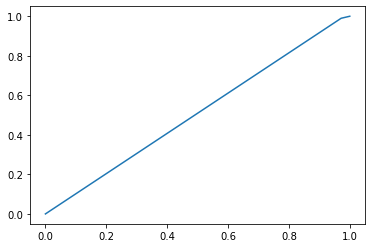

In [45]:
from sklearn import metrics
yp = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, yp)
auc = round(metrics.roc_auc_score(Y_test, yp), 4)
plt.plot(fpr,tpr,label="nn, AUC="+str(auc))